In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-whitegrid')

In [2]:
pd.set_option('display.max_rows', None)
clinical_df = pd.read_csv('craniosynostosis_clinical_data.csv')

# Show dataframe
# print(df)
# df.columns
clinical_df = clinical_df.fillna(0)
clinical_df = clinical_df[clinical_df['If longitudinal  name of event'] == 0]
print(clinical_df)

ct_icv_df = pd.read_csv('icv_rfov_f01.txt',sep=' ')
print(ct_icv_df)

     Study ID If longitudinal  name of event Sex  Age at scan (days)  ICV (ml)
0    PAT_0001                              0   F                1702      1301
1    PAT_0005                              0   M                 629      1384
2    PAT_0006                              0   M                 286      1049
3    PAT_0007                              0   M                1354      1303
4    PAT_0008                              0   M                 222       924
5    PAT_0009                              0   M                 291       896
6    PAT_0010                              0   M                 152      1014
7    PAT_0011                              0   F                 341       958
8    PAT_0012                              0   M                2042      1263
9    PAT_0014                              0   M                2063      1317
10   PAT_0015                              0   M                6577      1760
11   PAT_0016                              0   M    

     manual       ct_icv      name        diff
0      1384  1458.198625  PAT_0005   74.198625
1      1049  1045.427312  PAT_0006   -3.572688
2      1303  1297.925000  PAT_0007   -5.075000
3       924  1009.934687  PAT_0008   85.934687
4       896   970.481375  PAT_0009   74.481375
5      1014  1066.987750  PAT_0010   52.987750
6       958  1004.400250  PAT_0011   46.400250
7      1263  1365.950250  PAT_0012  102.950250
8      1317  1341.046125  PAT_0014   24.046125
9      1760  1756.713250  PAT_0015   -3.286750
10      966   984.000125  PAT_0016   18.000125
11      941   959.067250  PAT_0017   18.067250
12     1093  1122.020875  PAT_0018   29.020875
13     1772  1658.233000  PAT_0019 -113.767000
14     1772  1771.069875  PAT_0019   -0.930125
15     1629  1665.411875  PAT_0020   36.411875
16     1044  1072.393875  PAT_0021   28.393875
17      930   987.981813  PAT_0023   57.981813
18      980  1035.666937  PAT_0024   55.666937
19     1229  1269.591000  PAT_0025   40.591000
20     1117  

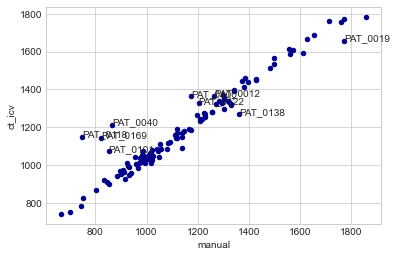

In [3]:
paired_data = {'manual': [], 'ct_icv': [], 'name':[], 'diff': []}

count = 0
for i, r in clinical_df.iterrows():
    name = r[0]
    for j, rr in ct_icv_df.iterrows():
        if name in rr[0]:
            paired_data['manual'].append(r[4])
            paired_data['ct_icv'].append(rr[2]/1000)
            paired_data['name'].append(name)
            paired_data['diff'].append((rr[2]/1000) - r[4])

paired_df = pd.DataFrame(paired_data)
# print(paired_df)

ax = paired_df.plot.scatter(x='manual', y='ct_icv', c='DarkBlue')
for i, r in paired_df.iterrows():
    if abs(r[3]) > 90:
        ax.annotate(r[2], (r[0], r[1])) 
        
print(paired_df)